In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import common

In [2]:
plt.style.use("tableau-colorblind10")

In [3]:
online_pr = xr.open_dataset("fig_data/online_precipitation.nc")
offline_pr = xr.open_dataset("fig_data/offline_precipitation.nc")

In [4]:
online_zc_pr_bias = common.kg_m2_s_to_mm_day(online_pr['emulator_mean'] - offline_pr['fortran_mean']).mean()
online_zc_pr_diag_bias = common.kg_m2_s_to_mm_day(online_pr['fortran_mean'] - offline_pr['fortran_mean']).mean()

In [7]:
print(f"Offline RMSE: {common.kg_m2_s_to_mm_day(np.sqrt(offline_pr['mse'].mean()).values):1.2f} mm/day")
print(f"Online RMSE: {common.kg_m2_s_to_mm_day(np.sqrt(online_pr['mse'].mean()).values):1.2f} mm/day")
print(f"Online bias: {online_zc_pr_bias.values:1.2e} mm/day")
print(f"Online diag bias: {online_zc_pr_diag_bias.values:1.2e} mm/day")

Offline RMSE: 0.22 mm/day
Online RMSE: 0.89 mm/day
Online bias: -2.23e-02 mm/day
Online diag bias: -3.99e-02 mm/day


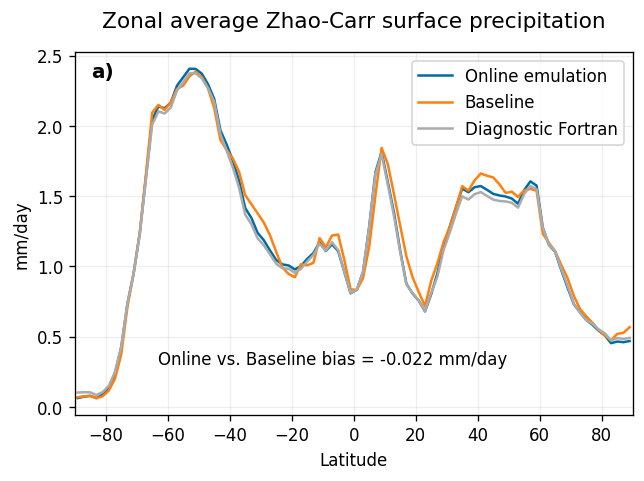

In [8]:
fig, ax = plt.subplots(dpi=120)
online_pr["zonal_surface_precipitation_due_to_zhao_carr_emulator"].mean(dim=["init", "time"]).plot(label="Online emulation")
offline_pr["zonal_surface_precipitation_due_to_zhao_carr_physics"].mean(dim=["init", "time"]).plot(label="Baseline")
online_pr["zonal_surface_precipitation_due_to_zhao_carr_physics"].mean(dim=["init", "time"]).plot(label="Diagnostic Fortran")
plt.ylabel("mm/day")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.title("Zonal average Zhao-Carr surface precipitation", size=13, pad=15)
plt.legend()
plt.grid(alpha=0.2)
ax.text(0.03, 0.93, "a)", fontdict=dict(size=12, weight="bold"), transform=ax.transAxes)
ax.text(0.15, 0.14, f"Online vs. Baseline bias = {online_zc_pr_bias.values:.3f} mm/day", transform=ax.transAxes)
common.savefig("zonal_precip_zc")
plt.show()

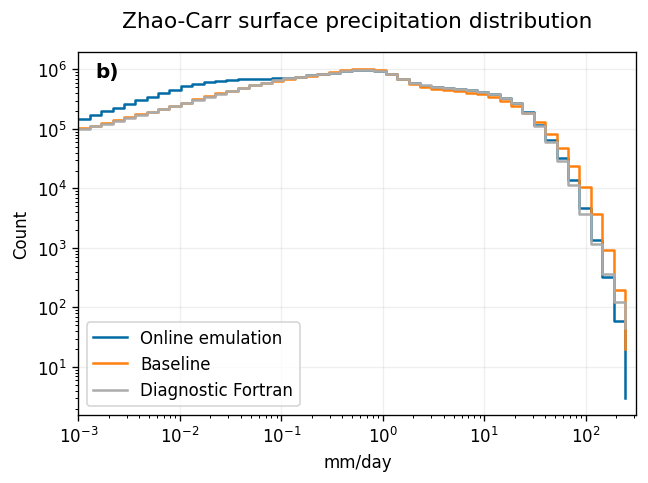

In [9]:
fig, ax = plt.subplots(dpi=120)
bins = online_pr["bin_edges"].values
count_emu = online_pr["emulator_hist_counts"].sum(dim="init").values
count_diag_fort = online_pr["fortran_hist_counts"].sum(dim="init").values
count_fort = offline_pr["fortran_hist_counts"].sum(dim="init").values
plt.step(bins[:-1], count_emu, where="post", label="Online emulation")
plt.step(bins[:-1], count_fort, where="post", label="Baseline")
plt.step(bins[:-1], count_diag_fort, where="post", label="Diagnostic Fortran")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(bins[0], bins[-1])
plt.legend()
ax.text(0.03, 0.93, "b)", fontdict=dict(size=12, weight="bold"), transform=ax.transAxes)
plt.xlabel("mm/day")
plt.ylabel("Count")
plt.title("Zhao-Carr surface precipitation distribution", size=13, pad=15)
plt.grid(alpha=0.2)
common.savefig("zc_precip_distribution")
plt.show()